# Example analysis of *E. coli* genome

In [2]:
# Import OriAnalyzer class
from ori_analyzer import OriAnalyzer

In [4]:
# Initialize instance of OriAnalyzer and read genome file
analyzer = OriAnalyzer()
analyzer.read_sequence(input_path="genome.txt")

'AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATATAGGCATAGCGCACAGACAGATAAAAATTACAGAGTACACAACATCCATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCACAGGTAACGGTGCGGGCTGACGCGTACAGGAAACACAGAAAAAAGCCCGCACCTGACAGTGCGGGCTTTTTTTTTCGACCAAAGGTAACGAGGTAACAACCATGCGAGTGTTGAAGTTCGGCGGTACATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCGATATTCTGGAAAGCAATGCCAGGCAGGGGCAGGTGGCCACCGTCCTCTCTGCCCCCGCCAAAATCACCAACCACCTGGTGGCGATGATTGAAAAAACCATTAGCGGCCAGGATGCTTTACCCAATATCAGCGATGCCGAACGTATTTTTGCCGAACTTTTGACGGGACTCGCCGCCGCCCAGCCGGGGTTCCCGCTGGCGCAATTGAAAACTTTCGTCGATCAGGAATTTGCCCAAATAAAACATGTCCTGCATGGCATTAGTTTGTTGGGGCAGTGCCCGGATAGCATCAACGCTGCGCTGATTTGCCGTGGCGAGAAAATGTCGATCGCCATTATGGCCGGCGTATTAGAAGCGCGCGGTCACAACGTTACTGTTATCGATCCGGTCGAAAAACTGCTGGCAGTGGGGCATTACCTCGAATCTACCGTCGATATTGCTGAGTCCACCCGCCGTATTGCGGCAAGCCGCATTCCGGCTGATCACATGGTGCTGATGGCAGGTTTCACCGCCGGTAATGAAAAAGGCGAACTGGTGGTGCTTGGACGCAACGGTTCCGACTACTCTGCTGCGGTGCTGGCTGCCTGTTTACGCGCCGAT

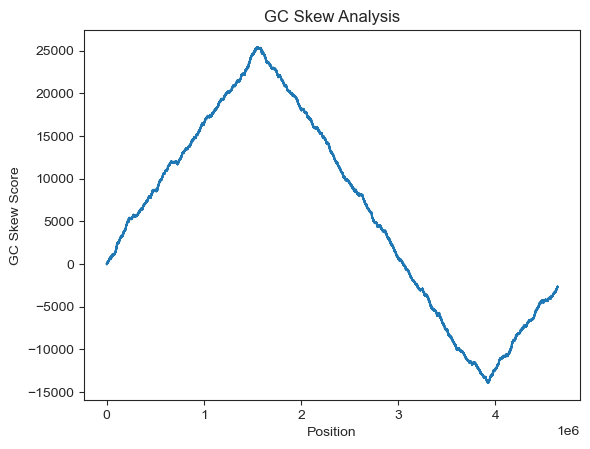

In [5]:
# Calculate GC skew and plot it
analyzer.calculate_gc_skew()
analyzer.plot_skew()

The GC skew plot for *E. coli* reveals distinct regions characterized by shifts in GC count. Typically, the transition point where the skew shifts from minimum to maximum indicates the region where the origin of replication (Ori) is likely located.

In [7]:
# Get genomic position of transition from minimum to maximum
min_position, max_position = analyzer.min_max_skew()
print(f"Minimum position: {min_position}")

Minimum position: [3923620, 3923621, 3923622, 3923623]


Given that the GC skew values remain constant for these four positions, we will utilize the first position as the starting point to define the region of interest. We will also focus on 9-mers as Ori motifs since this is the most common motif length in *E. coli*.

In [14]:
# Extract first position
start_position = min_position[0]
# Define end of region of interest
stop_position = start_position + 1000

# Generate k-mers
k_mers = analyzer.generate_k_mers(
    k_mer_length=9,
    seq_range=(start_position, stop_position))

We will generate the 1-d neighborhood of the identified 9-mers. This entails considering 9-mers with up to 1 difference in base composition as equivalent. Additionally, we will generate the reverse complements of these 9-mers to account for motif sequences present in the reverse complement DNA strand.

In [17]:
# Generate 1-neighbourhood
neighbourhood = analyzer.neighbourhood_dictionary(
    k_mers=k_mers,
    distance=1,
    reverse_complement=True)

# Generate pattern frequency
frequency = analyzer.pattern_frequency(
    seq_range=(start_position, stop_position),
    neighbourhood_dict=neighbourhood)

# Extract the most common motifs found and their respective count
patterns = analyzer.most_frequent_patterns(frequency_dict=frequency)
print(patterns)

(5, ['GATCCGGCT', 'GCTGGGATC', 'GATCCCAGC', 'TTATCCACA', 'TGTGGATAA'])


The experimentally validated DnaA box sequence in *E. coli*, **TTATCCACA**, along with its reverse complement, **TGTGGATAA**, is present among the most frequent motifs within the region extending from the GC skew minimum point to 1000 base pairs downstream.